In [13]:
import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from scipy.stats import skew, norm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from IPython.core.display import display, HTML
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve
from scipy import stats
from sklearn.utils import shuffle

In [2]:
train = pd.read_csv('drive/My Drive/Data Science/House Predictions/train.csv')
test = pd.read_csv('drive/My Drive/Data Science/House Predictions/test.csv')
sample_submission = pd.read_csv('drive/My Drive/Data Science/House Predictions/sample_submission.csv')

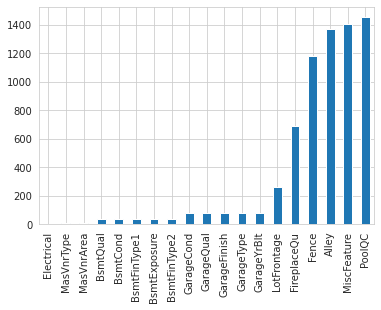

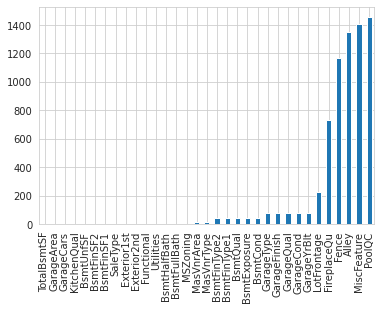

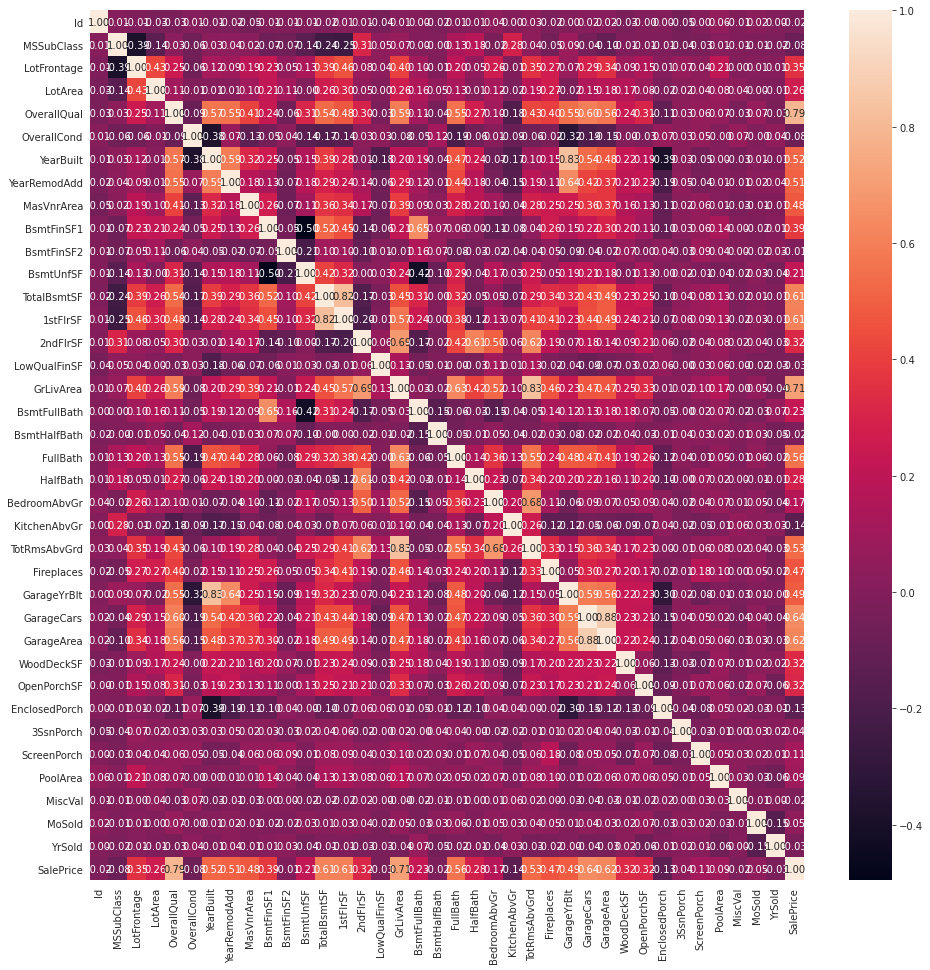

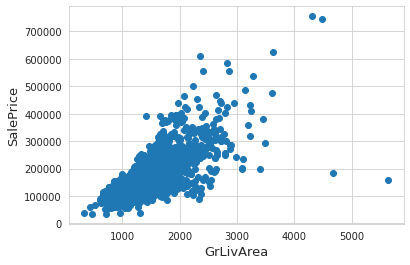

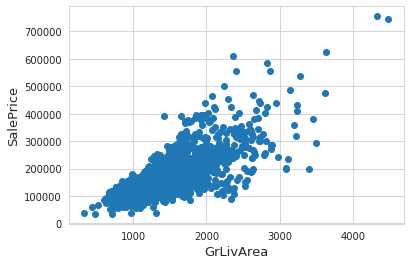


 mu = 180932.92 and sigma = 79467.79



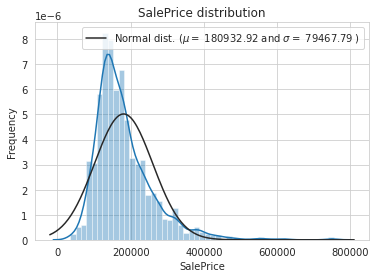

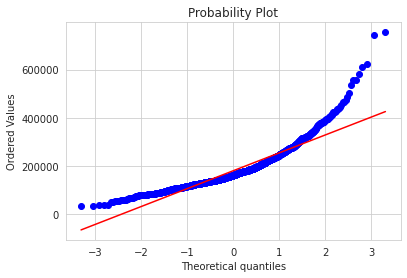


 mu = 12.02 and sigma = 0.40



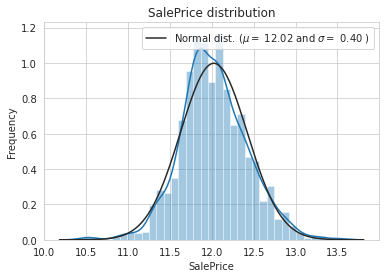

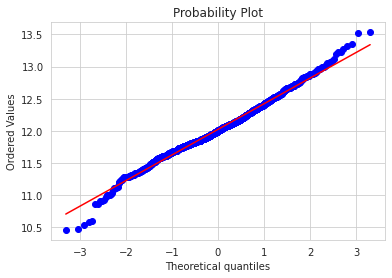


 mu = 1498.25 and sigma = 496.82



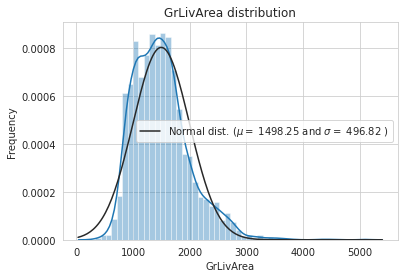

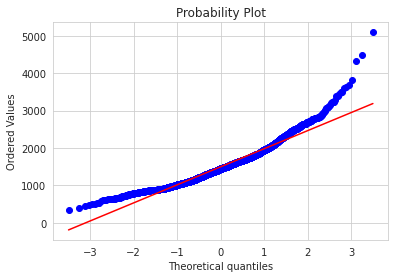


 mu = 7.26 and sigma = 0.32



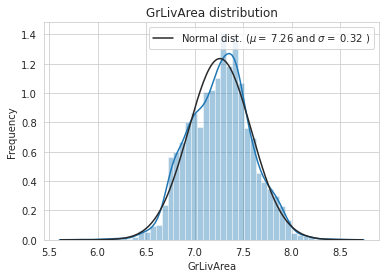

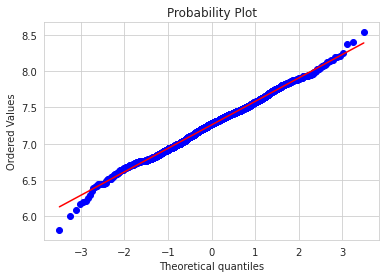

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   object 
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   int64  
 7   LandContour    2917 non-null   int64  
 8   Utilities      2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   int64  
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
# Missing data
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

sns.set_style("whitegrid")
missing2 = test.isnull().sum()
missing2 = missing2[missing2 > 0]
missing2.sort_values(inplace=True)
missing2.plot.bar()
plt.show()



plt.subplots(figsize=(16,16))
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.show()  

 
#Discover Outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


#Deleting outliers especially Correlation Rate is High One
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


tum= pd.concat([train,test],axis=0)


# Filling "0" instead of Missing Values
sıfır = ["LotFrontage" , "Alley" , "MasVnrType" , "BsmtQual" ,  
"BsmtCond", "BsmtExposure" , "FireplaceQu", "GarageFinish", "GarageQual" , "GarageCond" ,
"BsmtFinType1" ,"BsmtFinType2" , "GarageType" ,"GarageFinish", "PoolQC" ,"Fence",
"MiscFeature", "Functional","KitchenQual", "TotalBsmtSF","Exterior1st", "Exterior2nd"]

for i in sıfır:
    tum[i]=tum[i].fillna("0")  
    
    
tum.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","Id" ],axis=1,inplace=True)

tum['BsmtFullBath']=tum['BsmtFullBath'].fillna(tum['BsmtFullBath'].mode()[0]) 
tum['BsmtHalfBath']=tum['BsmtHalfBath'].fillna(tum['BsmtHalfBath'].mode()[0]) 
tum['Electrical']=tum['Electrical'].fillna(tum['Electrical'].mode()[0]) 
tum['GarageArea']=tum['GarageArea'].fillna(tum['GarageArea'].mean())
tum['GarageCars']=tum['GarageCars'].fillna(tum['GarageCars'].mode()[0]) 
tum['GarageYrBlt']=tum['GarageYrBlt'].fillna(tum['GarageYrBlt'].mean())
tum['MSZoning']=tum['MSZoning'].fillna(tum['MSZoning'].mode()[0]) 
tum['MasVnrArea']=tum['MasVnrArea'].fillna(tum['MasVnrArea'].mean())
tum['SaleType']=tum['SaleType'].fillna(tum['SaleType'].mode()[0]) 
tum['Utilities']=tum['Utilities'].fillna(tum['Utilities'].mode()[0]) 


tum.isnull().sum()




#Distribution of Saleprice 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



#Log-transformation of the target SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

sns.distplot(tum['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(tum['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(tum['GrLivArea'], plot=plt)
plt.show()


# Log-transformation of the target GrLivArea
tum['GrLivArea'] = np.log1p(tum['GrLivArea'])

sns.distplot(tum['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(tum['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(tum['GrLivArea'], plot=plt)
plt.show()


# Label Encoding of Some Columuns
label = ["LotShape" , "LandContour" ,  "LandSlope" , "OverallQual", "OverallCond", "ExterQual" ,
"ExterCond" , "BsmtQual", "BsmtCond" ,"BsmtExposure" , "BsmtFinType1" , "BsmtFinType2" ,  
"HeatingQC" , "CentralAir" ,  "KitchenQual" , "Fireplaces" , "FireplaceQu",
  "TotRmsAbvGrd" , "GarageFinish", "GarageCars" , "GarageQual", "GarageCond",
"PoolQC","Fence" ]

for c in label:
    lbl = LabelEncoder() 
    lbl.fit(list(tum[c].values)) 
    tum[c] = lbl.transform(list(tum[c].values))

tum.info()

tum["TotalBsmtSF"] = tum["TotalBsmtSF"].astype('int64')
tum["LotFrontage"] = tum["LotFrontage"].astype('int64')
tum["MSSubClass"] = tum["MSSubClass"].astype("object")
tum = pd.get_dummies(tum)


print(tum.head())
print(tum.info())

# Some Columuns have been Standardized
standardize = ["LotFrontage" ,"LotArea", "YearBuilt", 
               "MasVnrArea", "TotalBsmtSF",
"1stFlrSF" ,  "2ndFlrSF" , "LowQualFinSF", 
"GarageYrBlt", "GarageArea" , "WoodDeckSF", "OpenPorchSF" , "EnclosedPorch", "3SsnPorch" , "ScreenPorch",
"PoolArea" , "MiscVal", "YrSold", "YearRemodAdd"]


sc = StandardScaler()
for i in standardize:
    tum[[i]] = sc.fit_transform(tum[[i]])
    
tum = tum.reindex(sorted(tum.columns), axis=1)


train=tum.iloc[:train.shape[0], :]
test=tum.iloc[train.shape[0]:,:]
test.head()

sale_price = train[["SalePrice"]]    
train.drop(["SalePrice" ],axis=1,inplace=True)
test.drop(["SalePrice" ],axis=1,inplace=True)


In [10]:
X_train = train.copy()
y_train = sale_price.copy()

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

**Pytorch Model**

In [4]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [51]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(245,600)
    self.fc2 = nn.Linear(600,2)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.fc1(x)
    x = self.dropout(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.sigmoid(x)
    return x 

model = Net()
print(model)    

Net(
  (fc1): Linear(in_features=245, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [58]:
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

In [59]:
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [61]:
batch_size = 64
n_epochs = 50
batch_no = len(X_train) // batch_size

for epoch in range(n_epochs):
  if epoch% 5 == 0:
    print("Epoch {}".format(epoch+1))
  x_train, y_train = shuffle(x_train, y_train)
  # Mini Batch Learning

  for i in range(batch_no):
    start = i*batch_size
    end = start + batch_size

    x_var = Variable(torch.FloatTensor(x_train[start:end].values))
    y_var = Variable(torch.FloatTensor(y_train[start:end].values))

    optimizer.zero_grad()
    y_pred_var = model(x_var)
    loss = criterion(y_pred_var, y_var)
    loss.backward()
    optimizer.step()   

Epoch 1


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarni

Epoch 6
Epoch 11
Epoch 16
Epoch 21
Epoch 26
Epoch 31
Epoch 36
Epoch 41
Epoch 46


In [36]:
np.shape(X_train)

(1458, 245)

In [44]:
np.shape(y_var)

torch.Size([64, 1])

In [55]:
np.shape(y_pred_var)

torch.Size([64, 2])

In [57]:
y_var

tensor([[ 98000],
        [137000],
        [127500],
        [320000],
        [183000],
        [183200],
        [ 98000],
        [230000],
        [109900],
        [231500],
        [118000],
        [197500],
        [140000],
        [147000],
        [176000],
        [423000],
        [221500],
        [270000],
        [136500],
        [280000],
        [169000],
        [236500],
        [266000],
        [248000],
        [144000],
        [100000],
        [185000],
        [156500],
        [192000],
        [200141],
        [119200],
        [128950],
        [125000],
        [126000],
        [164900],
        [147000],
        [197000],
        [190000],
        [174000],
        [200000],
        [130000],
        [136000],
        [341000],
        [285000],
        [187500],
        [181000],
        [180000],
        [135000],
        [163000],
        [210000],
        [ 61000],
        [ 82000],
        [134800],
        [302000],
        [132000],
        [2